<a href="https://colab.research.google.com/github/SahaBhaskar/mybimwork/blob/main/ML_Assignment_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
! pip install pyclustering

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**PRICE PREDICTION OF USA HIGH QUALITY BACKPACKS**

This diverse dataset contains information about the startup ecosystem: organizations, funds etc

**PROBLEM DEFINITION**

To use multiple avenues for exploration: EDA, Classification, Regrassion, Ensemble ML

In [ ]:
# Importing Libraries for Loading Dataset
import numpy as np
import pandas as pd
from scipy.sparse import csr_matrix
import scipy.stats as stats

# Importing required libraries for data visualisation
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from io import StringIO
import plotly.express as px
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder
from pyclustering.cluster.kmedoids import kmedoids
from pyclustering.cluster.center_initializer import kmeans_plusplus_initializer
from pyclustering.cluster import cluster_visualizer
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
import networkx as nx
from collections import Counter
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

# Libraries for cross validation 
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import KFold
from sklearn import metrics
from sklearn.ensemble import RandomForestRegressor

from sklearn import datasets
from sklearn.model_selection import cross_val_score, cross_val_predict

# Train-test split
from sklearn.model_selection import train_test_split
# Min-max scling
from sklearn.preprocessing import MinMaxScaler
# Statsmodel 
import statsmodels.api as sm
# VIF 
from statsmodels.stats.outliers_influence import variance_inflation_factor
#R-squared
from sklearn.metrics import r2_score
# Label encoding
from sklearn.preprocessing import LabelEncoder
# Importing RFE
from sklearn.feature_selection import RFE
# Importing LinearRegression
from sklearn.linear_model import LinearRegression
# Supress warning
import warnings
warnings.filterwarnings('ignore')


In [ ]:
# "USA High Quality Made - Backpacks" dataset
try:
    df_data = pd.read_csv("/content/sample_data/USA High Quality Made - Backpacks.csv", low_memory=False)
    print(len(df_data))
    df_data.head(3)
except:
    print("USA High Quality Made - Backpacks.csv file not found in root directory.")

107


In [ ]:
df_data['Brand'].value_counts()

The North Face        26
Topo Design           20
Osprey                16
Patagonia             13
DSPTCH®               11
Goruck                 8
Mystery Ranch          5
Mountain Hardwear      5
THE BROWN BUFFALO®     3
Name: Brand, dtype: int64

There are 9 types of Brand in the USA Bag market. Now check data of each of them

In [ ]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 107 entries, 0 to 106
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Product                     107 non-null    object
 1   Brand                       107 non-null    object
 2   Country of Origin           107 non-null    object
 3   Type                        107 non-null    object
 4   Image URL                   107 non-null    object
 5   Laptop Compartment          107 non-null    object
 6   Capacity (Volume in Liter)  107 non-null    object
 7   Material                    107 non-null    object
 8   Average Weight (Kg)         107 non-null    object
 9   Waterproof                  107 non-null    object
 10  Water-repellent             107 non-null    object
 11  Price (USD)                 107 non-null    object
dtypes: object(12)
memory usage: 10.2+ KB


In [ ]:
#Rename Specific Columns

# Rename the existing DataFrame (rather than creating a copy) 

df_data.rename(columns={'Country of Origin': 'Country_of_Origin', 'Laptop Compartment':'Laptop_Compartment', 'Capacity (Volume in Liter)':'Capacity_in_ltr', 'Average Weight (Kg)':'Avg_weight_in_kg', 'Price (USD)':'Price_in_USD'}, inplace=True)
df_data.head()

,Product,Brand,Country_of_Origin,Type,Image URL,Laptop_Compartment,Capacity_in_ltr,Material,Avg_weight_in_kg,Waterproof,Water-repellent,Price_in_USD
0,Surge Backpack,The North Face,USA,Daypack,https://images.thenorthface.com/is/image/TheNo...,Yes,31,210D recycled nylon ripstop with non-PFC durab...,1.2,No,Yes,129
1,Borealis Backpack,The North Face,USA,Daypack,https://images.thenorthface.com/is/image/TheNo...,Yes,28,210D recycled nylon ripstop with non-PFC durab...,1,No,Yes,99
2,Router Backpack,The North Face,USA,Daypack,https://images.thenorthface.com/is/image/TheNo...,Yes,40,210D recycled nylon ripstop with non-PFC durab...,1.3,No,Yes,159
3,Commuter Roll Top Pack,The North Face,USA,Commuting/Daypack,https://images.thenorthface.com/is/image/TheNo...,Yes,23,300D recycled polyester with TPU laminate,0.9,No,Yes,129
4,Jester Backpack,The North Face,USA,Daypack,https://images.thenorthface.com/is/image/TheNo...,Yes,28,600D recycled polyester with non-PFC durable w...,0.74,No,Yes,69


In [ ]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 107 entries, 0 to 106
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Product             107 non-null    object
 1   Brand               107 non-null    object
 2   Country_of_Origin   107 non-null    object
 3   Type                107 non-null    object
 4   Image URL           107 non-null    object
 5   Laptop_Compartment  107 non-null    object
 6   Capacity_in_ltr     107 non-null    object
 7   Material            107 non-null    object
 8   Avg_weight_in_kg    107 non-null    object
 9   Waterproof          107 non-null    object
 10  Water-repellent     107 non-null    object
 11  Price_in_USD        107 non-null    object
dtypes: object(12)
memory usage: 10.2+ KB


**'Image url' field will be irrelevent for our analysis. so we decided to drop the field for this analysis.**

In [ ]:
df_data.drop(["Image URL"], axis="columns", inplace=True)
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 107 entries, 0 to 106
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Product             107 non-null    object
 1   Brand               107 non-null    object
 2   Country_of_Origin   107 non-null    object
 3   Type                107 non-null    object
 4   Laptop_Compartment  107 non-null    object
 5   Capacity_in_ltr     107 non-null    object
 6   Material            107 non-null    object
 7   Avg_weight_in_kg    107 non-null    object
 8   Waterproof          107 non-null    object
 9   Water-repellent     107 non-null    object
 10  Price_in_USD        107 non-null    object
dtypes: object(11)
memory usage: 9.3+ KB


It's Evident from the Dtype that there is some mixed data type is present in some field for example Average weight, Price shopuld be integer in type however it has been shown as object.

In [ ]:
df_data['Capacity_in_ltr'].value_counts()

25          9
20          7
18          7
28          7
30          6
22          6
26          4
24          4
16          4
21          4
32          3
27          3
34          2
15          2
10          2
21.6        2
45          2
36          2
55          2
40          2
18.5        1
26 - 40     1
23.8        1
12          1
42          1
12.8        1
24.3        1
33 - 39     1
44          1
20 - 25     1
31          1
26 - 32     1
21 - 26     1
40/55/90    1
35          1
32 - 40     1
25 - 32     1
26 - 30     1
20 - 30     1
85          1
15 - 25     1
75          1
38          1
65          1
6           1
23          1
46          1
Name: Capacity_in_ltr, dtype: int64

In [ ]:
df_data['Product'].value_counts()

Surge Backpack                             1
Bookpack - Black Multicam Cordura Nylon    1
Ridgepack - Ecopak                         1
Ridgepack - Black Dyneema                  1
Ridgepack - Ballistic Nylon                1
                                          ..
Ultralight Black Hole® Tote Pack 27L       1
Descensionist Pack 40L                     1
Refugio Daypack 26L                        1
Arbor Lid Pack 28L                         1
Farpoint 40                                1
Name: Product, Length: 107, dtype: int64

In [ ]:
df_data['Type'].value_counts()

Daypack/Outdoor                       57
Daypack                               13
Daypack/Traveling/Outdoor/Tactical     8
Daypack/Outdoor/Tactical               5
Daypack/Outdoor/Traveling              5
Daypack/Traveling                      3
Skiing/Mountaineering                  2
Commuting/Daypack                      2
Daypack/Travelling                     2
Hiking/Mountaineering                  2
Traveling/Trail/Hiking/Camping         1
Climbing                               1
Climbing/Mountaineering                1
Climbing/Trail/Camping                 1
Daypack/Totepack                       1
Daypack/Traveling/Outdoor              1
Hiking/Trail/Camping                   1
Traveling/Daypack                      1
Name: Type, dtype: int64

In [ ]:
df_data['Country_of_Origin'].value_counts()

USA    107
Name: Country_of_Origin, dtype: int64

**As all the bags country of origin is USA we will drop the coulmn.**

In [ ]:
df_data.drop(['Country_of_Origin'], axis="columns", inplace=True)
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 107 entries, 0 to 106
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Product             107 non-null    object
 1   Brand               107 non-null    object
 2   Type                107 non-null    object
 3   Laptop_Compartment  107 non-null    object
 4   Capacity_in_ltr     107 non-null    object
 5   Material            107 non-null    object
 6   Avg_weight_in_kg    107 non-null    object
 7   Waterproof          107 non-null    object
 8   Water-repellent     107 non-null    object
 9   Price_in_USD        107 non-null    object
dtypes: object(10)
memory usage: 8.5+ KB


In [ ]:
df_data['Waterproof'].value_counts()

No    107
Name: Waterproof, dtype: int64

In [ ]:
df_data['Water-repellent'].value_counts()

Yes    107
Name: Water-repellent, dtype: int64

**Since both the field 'waterproof' & 'Water-repellent' does have same data for all the 107 data entity it will not have any impact on the model and analysis so we will drop these two field from the dataset**

In [ ]:
df_data.drop(['Waterproof','Water-repellent'], axis="columns", inplace=True)
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 107 entries, 0 to 106
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Product             107 non-null    object
 1   Brand               107 non-null    object
 2   Type                107 non-null    object
 3   Laptop_Compartment  107 non-null    object
 4   Capacity_in_ltr     107 non-null    object
 5   Material            107 non-null    object
 6   Avg_weight_in_kg    107 non-null    object
 7   Price_in_USD        107 non-null    object
dtypes: object(8)
memory usage: 6.8+ KB


**The final objects dataset is now filtered and looks like the following:**

In [ ]:
df_data.head(3)

,Product,Brand,Type,Laptop_Compartment,Capacity_in_ltr,Material,Avg_weight_in_kg,Price_in_USD
0,Surge Backpack,The North Face,Daypack,Yes,31,210D recycled nylon ripstop with non-PFC durab...,1.2,129
1,Borealis Backpack,The North Face,Daypack,Yes,28,210D recycled nylon ripstop with non-PFC durab...,1,99
2,Router Backpack,The North Face,Daypack,Yes,40,210D recycled nylon ripstop with non-PFC durab...,1.3,159


In [ ]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 107 entries, 0 to 106
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Product             107 non-null    object
 1   Brand               107 non-null    object
 2   Type                107 non-null    object
 3   Laptop_Compartment  107 non-null    object
 4   Capacity_in_ltr     107 non-null    object
 5   Material            107 non-null    object
 6   Avg_weight_in_kg    107 non-null    object
 7   Price_in_USD        107 non-null    object
dtypes: object(8)
memory usage: 6.8+ KB


### As the among data types  has Capacity, Average weight & Price has int type data we need to change the object data type into float Dtype

In [ ]:
df_data['Capacity_in_ltr'].value_counts()

25          9
20          7
18          7
28          7
30          6
22          6
26          4
24          4
16          4
21          4
32          3
27          3
34          2
15          2
10          2
21.6        2
45          2
36          2
55          2
40          2
18.5        1
26 - 40     1
23.8        1
12          1
42          1
12.8        1
24.3        1
33 - 39     1
44          1
20 - 25     1
31          1
26 - 32     1
21 - 26     1
40/55/90    1
35          1
32 - 40     1
25 - 32     1
26 - 30     1
20 - 30     1
85          1
15 - 25     1
75          1
38          1
65          1
6           1
23          1
46          1
Name: Capacity_in_ltr, dtype: int64

In [ ]:
df_data['Avg_weight_in_kg'].value_counts()

Not Specified    25
1                 7
0.9               7
0.45              5
1.2               5
1.3               4
1.1               4
0.8               3
1.6               2
1.5               2
1.36              2
0.6               2
1.33              2
1.17              1
0.303             1
0.647             1
0.88              1
0.73              1
1.7 - 2.1         1
1.2 - 1.5         1
2.5               1
1.5 - 1.9         1
1.3 - 1.5         1
0.4               1
1.7 - 2.9         1
0.64              1
0.89              1
0.679             1
0.37              1
0.66              1
0.54              1
0.74              1
1.25              1
0.625             1
0.485             1
1.7               1
0.3               1
2                 1
1.8               1
1.27              1
1.29              1
0.69              1
0.34              1
0.81              1
0.795             1
0.65              1
0.52              1
1.19              1
1.28              1
1.45              1


In [ ]:
# Replace 'not specified' values with NaN & putting the average value of the other data set

df_data.replace('Not Specified', np.NaN, inplace=True)
df_data['Avg_weight_in_kg'].value_counts()

0.9          7
1            7
1.2          5
0.45         5
1.3          4
1.1          4
0.8          3
1.33         2
0.6          2
1.36         2
1.5          2
1.6          2
1.17         1
2.5          1
0.89         1
1.7 - 2.9    1
0.4          1
1.3 - 1.5    1
1.5 - 1.9    1
1.2 - 1.5    1
0.303        1
1.7 - 2.1    1
0.73         1
0.88         1
0.64         1
0.647        1
0.679        1
0.37         1
0.66         1
0.54         1
0.74         1
1.25         1
0.625        1
0.485        1
1.7          1
0.3          1
2            1
1.8          1
1.27         1
1.29         1
0.69         1
0.34         1
0.81         1
0.795        1
0.65         1
0.52         1
1.19         1
1.28         1
1.45         1
Name: Avg_weight_in_kg, dtype: int64

In [ ]:
df_data['Price_in_USD'].value_counts()

99           10
129           7
169           5
189           5
179           4
79            4
119           4
225           3
350           3
109           3
156           3
159           3
59            2
135           2
69            2
89            2
395           2
175           2
149           2
168           2
250           2
199           2
145           1
105           1
120           1
52.5          1
125           1
67.5          1
131           1
88.5          1
145.7         1
166.5         1
88.45         1
93.65         1
145.68        1
60            1
295           1
172           1
204           1
320           1
68.95         1
350 - 450     1
219           1
48.93         1
325           1
425           1
255           1
160           1
345           1
229           1
275           1
260           1
198           1
136.5         1
151           1
Name: Price_in_USD, dtype: int64

In [ ]:
## We will write a function to remove the range data from the above cloumns.
def to_float(val):
    if isinstance(val, str):
        if '/' in val:
            values = [float(x) for x in val.split('/')]
            return np.mean(values)
        elif '-' in val:
            values = [float(x) for x in val.split('-')]
            return np.mean(values)
    return float(val)
    
df_data['Capacity_in_ltr'] = df_data['Capacity_in_ltr'].apply(to_float)
df_data['Avg_weight_in_kg'] = df_data['Avg_weight_in_kg'].apply(to_float)
df_data['Price_in_USD'] = df_data['Price_in_USD'].apply(to_float)

df_data.dtypes


Product                object
Brand                  object
Type                   object
Laptop_Compartment     object
Capacity_in_ltr       float64
Material               object
Avg_weight_in_kg      float64
Price_in_USD          float64
dtype: object

In [ ]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 107 entries, 0 to 106
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Product             107 non-null    object 
 1   Brand               107 non-null    object 
 2   Type                107 non-null    object 
 3   Laptop_Compartment  80 non-null     object 
 4   Capacity_in_ltr     107 non-null    float64
 5   Material            107 non-null    object 
 6   Avg_weight_in_kg    82 non-null     float64
 7   Price_in_USD        107 non-null    float64
dtypes: float64(3), object(5)
memory usage: 6.8+ KB


In [ ]:
df_data.dtypes

Product                object
Brand                  object
Type                   object
Laptop_Compartment     object
Capacity_in_ltr       float64
Material               object
Avg_weight_in_kg      float64
Price_in_USD          float64
dtype: object

In [ ]:
num_nans = df_data.isna().sum().sum()
print('Number of NaN values:', num_nans)

Number of NaN values: 52


In [ ]:
df_data.isnull().sum()

Product                0
Brand                  0
Type                   0
Laptop_Compartment    27
Capacity_in_ltr        0
Material               0
Avg_weight_in_kg      25
Price_in_USD           0
dtype: int64

In [ ]:
mean = df_data['Avg_weight_in_kg'].mean()
df_data['Avg_weight_in_kg'].replace(np.NaN, mean , inplace=True)
df_data.isnull().sum()

Product                0
Brand                  0
Type                   0
Laptop_Compartment    27
Capacity_in_ltr        0
Material               0
Avg_weight_in_kg       0
Price_in_USD           0
dtype: int64

In [ ]:
df_data['Laptop_Compartment'].value_counts()

Yes                                75
Not Included -  Sold Separately     3
Yes, without front side padding     1
Yes, without padding                1
Name: Laptop_Compartment, dtype: int64

In [ ]:
df_data['Laptop_Compartment'].replace({'Not Included -  Sold Separately': 'No', 'Yes, without front side padding': 'Yes', 'Yes, without padding': 'Yes'}, inplace=True)
df_data['Laptop_Compartment'].value_counts()

Yes    77
No      3
Name: Laptop_Compartment, dtype: int64

In [ ]:
mode = df_data['Laptop_Compartment'].mode()[0]
df_data['Laptop_Compartment'].replace(np.NaN, mode , inplace=True)
df_data['Laptop_Compartment'].isnull().sum()

0

In [ ]:
df_data['Laptop_Compartment'].value_counts()

Yes    104
No       3
Name: Laptop_Compartment, dtype: int64

In [ ]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 107 entries, 0 to 106
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Product             107 non-null    object 
 1   Brand               107 non-null    object 
 2   Type                107 non-null    object 
 3   Laptop_Compartment  107 non-null    object 
 4   Capacity_in_ltr     107 non-null    float64
 5   Material            107 non-null    object 
 6   Avg_weight_in_kg    107 non-null    float64
 7   Price_in_USD        107 non-null    float64
dtypes: float64(3), object(5)
memory usage: 6.8+ KB


In [ ]:
df_data.isna().sum()

Product               0
Brand                 0
Type                  0
Laptop_Compartment    0
Capacity_in_ltr       0
Material              0
Avg_weight_in_kg      0
Price_in_USD          0
dtype: int64

In [ ]:
df_data.duplicated().sum()

0

<h1>Graphical exploratory data analysis (EDA)</h1>

Considered the **"Brand"** of the Bag companies with graphical representations

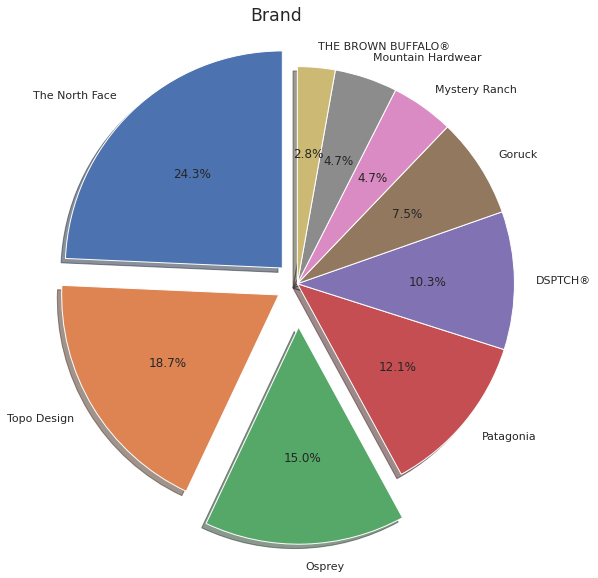

In [ ]:
# Pie chart, where the slices will be ordered and plotted counter-clockwise:
plt.rcParams['figure.figsize'] = 10,10
labels = df_data['Brand'].value_counts().index.tolist()
sizes = df_data['Brand'].value_counts().tolist()
explode = (0.1, 0.1, 0.2, 0, 0, 0, 0, 0, 0)

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode = explode, labels=labels, autopct='%1.1f%%',shadow=True, startangle=90)
ax1.axis('equal')
plt.title("Brand", fontdict=None, position= [0.48,1], size = 'x-large')

plt.show()

**The above graph highlights that percentage of the bag compaines in USA**

In [ ]:
# checking with tYPE
print("Unique Type : ",len(df_data['Type'].unique()))

Unique Type :  18


In [ ]:
print("Value Counts for each Type : ")
df_data['Type'].value_counts()

Value Counts for each Type : 


Daypack/Outdoor                       57
Daypack                               13
Daypack/Traveling/Outdoor/Tactical     8
Daypack/Outdoor/Tactical               5
Daypack/Outdoor/Traveling              5
Daypack/Traveling                      3
Skiing/Mountaineering                  2
Commuting/Daypack                      2
Daypack/Travelling                     2
Hiking/Mountaineering                  2
Traveling/Trail/Hiking/Camping         1
Climbing                               1
Climbing/Mountaineering                1
Climbing/Trail/Camping                 1
Daypack/Totepack                       1
Daypack/Traveling/Outdoor              1
Hiking/Trail/Camping                   1
Traveling/Daypack                      1
Name: Type, dtype: int64

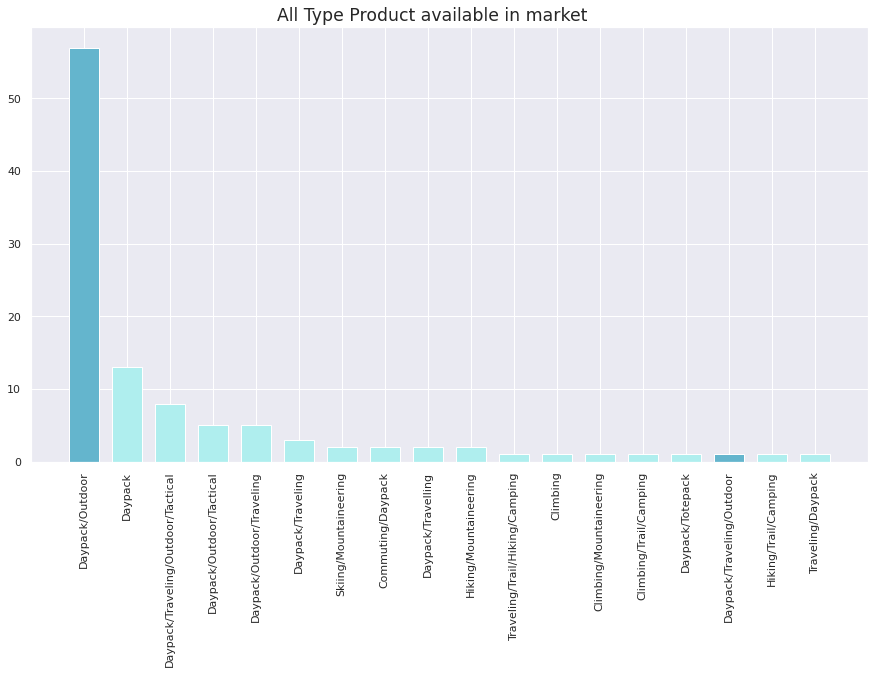

In [ ]:
# Grahically representing the "category code" data
plt.rcParams['figure.figsize'] = 15,8
height = df_data['Type'].value_counts().tolist()
bars =  df_data['Type'].value_counts().index.tolist()
y_pos = np.arange(len(bars))
plt.bar(y_pos, height , width=0.7 ,color= ['c']+['paleturquoise']*14)
plt.xticks(y_pos, bars)
plt.xticks(rotation=90)
plt.title("All Type Product available in market", fontdict=None, position= [0.48,1.05], size = 'x-large')
plt.show()

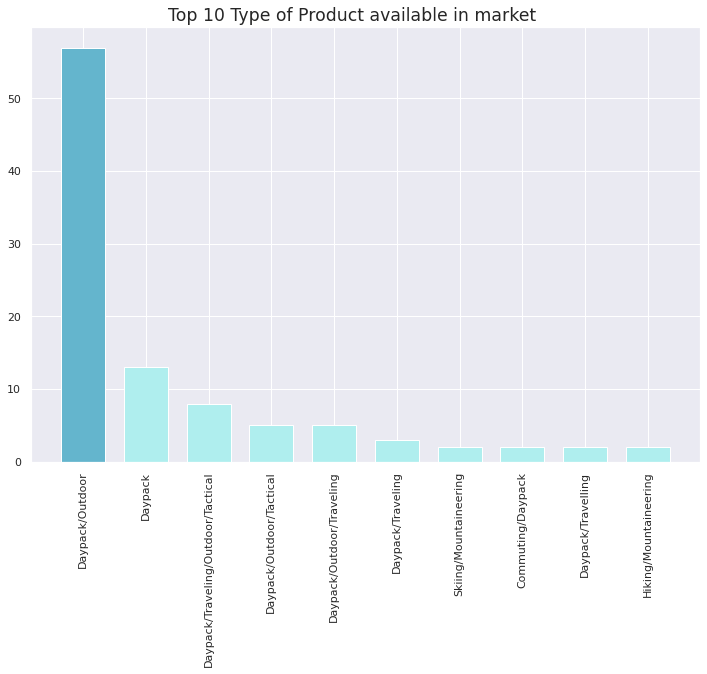

In [ ]:
# Taking the top 10 category codes for clearer bar graph
plt.rcParams['figure.figsize'] = 12,8
height = df_data['Type'].value_counts()[:10].tolist()
bars =  df_data['Type'].value_counts()[:10].index.tolist()
y_pos = np.arange(len(bars))
plt.bar(y_pos, height , width=0.7 ,color= ['c']+['paleturquoise']*14)
plt.xticks(y_pos, bars)
plt.xticks(rotation=90)
plt.title("Top 10 Type of Product available in market", fontdict=None, position= [0.48,1.05], size = 'x-large')
plt.show()

In [ ]:
# Create a function for categorical keywords (Generally used for display boards)
def count_word(df, ref_col, lists):
    keyword_count = dict()
    for s in lists: keyword_count[s] = 0
    for list_keywords in df[ref_col].str.split('|'):        
        if type(list_keywords) == float and pd.isnull(list_keywords): continue        
        for s in [s for s in list_keywords if s in lists]: 
            if pd.notnull(s): keyword_count[s] += 1
    # convert the dictionary in a list to sort the keywords by frequency
    keyword_occurences = []
    for k,v in keyword_count.items():
        keyword_occurences.append([k,v])
    keyword_occurences.sort(key = lambda x:x[1], reverse = True)
    return keyword_occurences, keyword_count

def makeCloud(Dict,name,color):
    words = dict()
    for s in Dict:
        words[s[0]] = s[1]
        wordcloud = WordCloud(width=1600, height=800, background_color=color, max_words=50, max_font_size=500, normalize_plurals=False)
        wordcloud.generate_from_frequencies(words)

    fig = plt.figure(figsize=(12, 8))
    plt.title(name)
    plt.imshow(wordcloud)
    plt.axis('off')

    plt.show()

In [ ]:
set_keywords = set()
for lists_keywords in df_data['Type'].str.split('|').values:
    if isinstance(lists_keywords, float): continue  # only happen if lists_keywords = NaN
    set_keywords = set_keywords.union(lists_keywords)

In [ ]:
keyword_occurences, dum = count_word(df_data, 'Type', set_keywords)

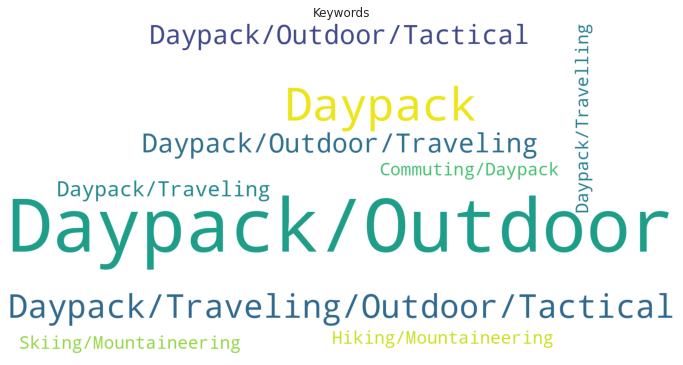

In [ ]:
# Create categorical display of 10 keywords for presentation purpose
makeCloud(keyword_occurences[0:10],"Keywords","White")

In [ ]:
print("Value counts of Backpacks in Type:")
df_data['Type'].value_counts()

Value counts of Backpacks in Type:


Daypack/Outdoor                       57
Daypack                               13
Daypack/Traveling/Outdoor/Tactical     8
Daypack/Outdoor/Tactical               5
Daypack/Outdoor/Traveling              5
Daypack/Traveling                      3
Skiing/Mountaineering                  2
Commuting/Daypack                      2
Daypack/Travelling                     2
Hiking/Mountaineering                  2
Traveling/Trail/Hiking/Camping         1
Climbing                               1
Climbing/Mountaineering                1
Climbing/Trail/Camping                 1
Daypack/Totepack                       1
Daypack/Traveling/Outdoor              1
Hiking/Trail/Camping                   1
Traveling/Daypack                      1
Name: Type, dtype: int64

In [ ]:
# Changing Strings to Int type for Interactive graphical representation & Sorting
mapping = {value: index for index, value in enumerate(df_data['Type'].unique())}
status_sort = df_data['Type'].replace(mapping)
status_sort

0       0
1       0
2       0
3       1
4       0
       ..
102    17
103    17
104    17
105    17
106    17
Name: Type, Length: 107, dtype: int64

In [ ]:
# creating scatter plot graph for Brands vs backpack price along with Laptop compartmrnt presence
fig = px.scatter(
    #df_objects_investments_funds[df_objects_investments_funds['funding_total_usd']!=0]
    df_data[df_data['Price_in_USD']>0]
    .sort_values(by='Type', key=lambda x: x.map(status_sort)),
    x='Brand',
    y='Price_in_USD',
    color='Type',
    title='',
    labels={'Brand': 'Brand name', 'Price_in_USD': 'Backpack Price'},)
fig.show()

In [ ]:
# creating scatter plot graph for Brans vs Capacity in Liters along with Laptop compartmrnt presence
fig = px.scatter(
    #df_objects_investments_funds[df_objects_investments_funds['funding_total_usd']!=0]
    df_data[df_data['Capacity_in_ltr']>0]
    .sort_values(by='Type', key=lambda x: x.map(status_sort)),
    x='Brand',
    y='Capacity_in_ltr',
    color='Type',
    title='',
    labels={'Brand': 'Brand name', 'Capacity_in_ltr': 'Backpack Capacity'},)
fig.show()

### What materials are most prevalent in the high quality backpacks, and do they determine the price? 
- We will use wordcloud to manually find the materials used for the backpacks. Note that we can manually look through all the columns since it is a small dataset, but let's have fun here.

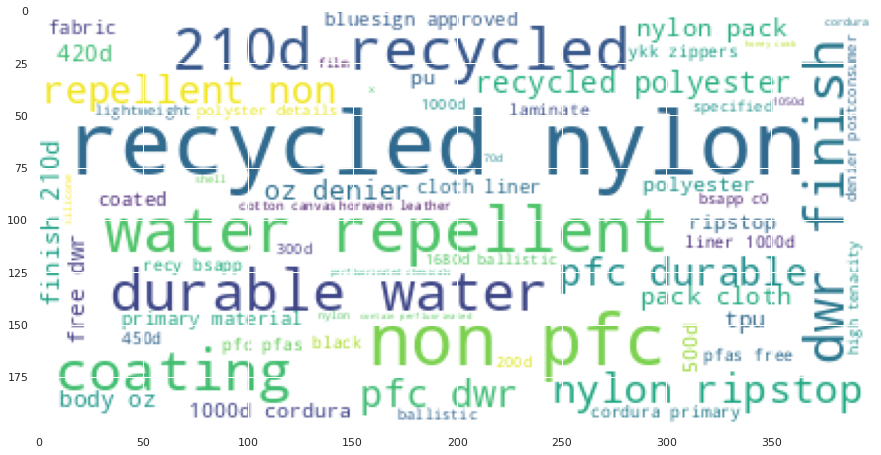

In [ ]:
#import wordcloud
from wordcloud import WordCloud, STOPWORDS

#generate text to use in wordcloud, join all entries in Material column into one string
text = ' '.join(df_data.Material.str.lower())

#create and generate wordcloud image
wordcloud = WordCloud(background_color='white').generate(text)

#create figure
plt.figure(figsize = (15,10))

#show image
plt.imshow(wordcloud)

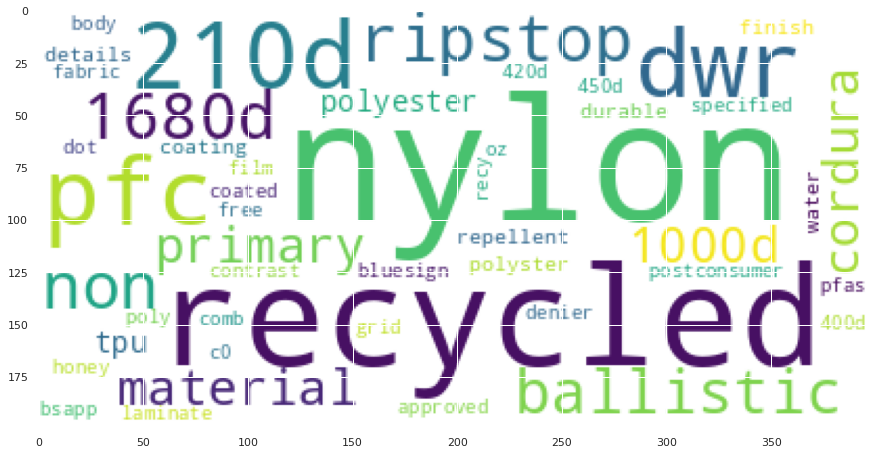

In [ ]:
#count the frequency of each material
material_freq = df_data['Material'].str.lower().value_counts()

#select the top ten most frequent materials
top_materials = material_freq.head(10)

#convert top materials to a string
text = ' '.join(top_materials.index)

#create and generate wordcloud image
wordcloud = WordCloud(background_color='white').generate(text)

#create figure
plt.figure(figsize=(15, 10))

#show image
plt.imshow(wordcloud)


In [ ]:
#iterate the materials found
materials = ['cotton', 'cordura', 'dyneema', 'canvas', 'denier', 'nylon', 'polyester']
import re
#create function to find primary material, we will assume that the first material in the description is the primary material
def find_primary_materials(entry):
    #initialize empty list
    materials_used = []
    #change string to lower case, then turn into list
    entry_as_list = entry.lower().replace('/',' ').split()
    #we will iterate through the list to find the matches, list the first match
    for word in entry_as_list:
        #initialize alphanumeric
        pattern = r'[^A-Za-z0-9]+'
        #remove non-alphanumeric characters in string
        word = re.sub(pattern, '', word)
        if word in materials:
            materials_used.append(word)
    #in case that the primary material is not included in our materials list
    if len(materials_used) == 0:
        materials_used = ['Other']
    #return our presumed primary material and capitalize for aesthetics
    return materials_used[0].capitalize()

In [ ]:
#extract primary material of each backpack
df_data['Material'] = df_data['Material'].apply(lambda x: find_primary_materials(x))

In [ ]:
display(df_data.query('Material == "Other"'))

,Product,Brand,Type,Laptop_Compartment,Capacity_in_ltr,Material,Avg_weight_in_kg,Price_in_USD
39,Rip Ruck 24 CC,Mystery Ranch,Daypack/Outdoor/Tactical,Yes,24.0,Other,1.00,175.0
83,ConcealPack™ 21L EDC - XPAC XV21 Fatigue,THE BROWN BUFFALO®,Daypack/Outdoor,No,21.0,Other,1.33,350.0
85,ConcealPack™ 21L EDC - X50 Multicam® Tropic,THE BROWN BUFFALO®,Daypack/Outdoor,No,21.0,Other,1.17,350.0


Text(0.5, 1.0, 'Prices distribution for each material')

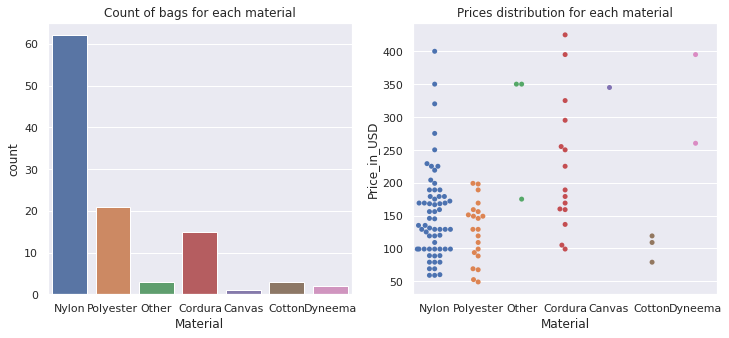

In [ ]:
#create figure
fig, ax = plt.subplots(1,2, figsize = (12,5))

#create plot with counts of materials
ax1 = sns.countplot(data = df_data, x = 'Material', ax = ax[0])
ax1.set_title('Count of bags for each material')

#create plot with prices for each material
ax2 = sns.swarmplot(data = df_data, y = 'Price_in_USD', x = 'Material')
ax2.set_title('Prices distribution for each material')

- The most common primary material is Nylon. The prices for backpacks which uses nylon and polyester as primary materials seem to have the same distribution. Cordura backpacks seem to have varying prices. Most backpacks tend to have prices from 50$ to 200\$, which is great news for us. We can conclude here that the materials used could determine the prices of the backpacks.

- But before that, we should see whether any combination type, brand, and materials could give us insights.

In [ ]:
#reload exploded dataset to copy new Material values
backpacks_type_exploded = df_data.copy()
backpacks_type_exploded['Type'] = backpacks_type_exploded.Type.str.split('/')
backpacks_type_exploded = backpacks_type_exploded.explode('Type')

#check dataframe
backpacks_type_exploded.head()

,Product,Brand,Type,Laptop_Compartment,Capacity_in_ltr,Material,Avg_weight_in_kg,Price_in_USD
0,Surge Backpack,The North Face,Daypack,Yes,31.0,Nylon,1.2,129.0
1,Borealis Backpack,The North Face,Daypack,Yes,28.0,Nylon,1.0,99.0
2,Router Backpack,The North Face,Daypack,Yes,40.0,Nylon,1.3,159.0
3,Commuter Roll Top Pack,The North Face,Commuting,Yes,23.0,Polyester,0.9,129.0
3,Commuter Roll Top Pack,The North Face,Daypack,Yes,23.0,Polyester,0.9,129.0


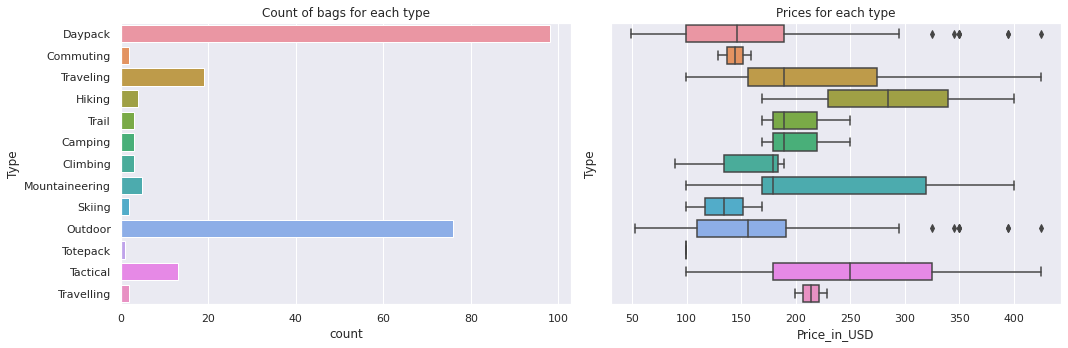

In [ ]:
#create figure
fig, ax = plt.subplots(1,2, figsize = (15,5), tight_layout = True)

#create axis of counts by type
ax1 = sns.countplot(data = backpacks_type_exploded, y = 'Type', ax = ax[0])
ax1.set_title('Count of bags for each type')

#create axis of prices by type
ax2 = sns.boxplot(data = backpacks_type_exploded, x = 'Price_in_USD', y = 'Type').set(yticklabels = [], title = 'Prices for each type')

plt.show()

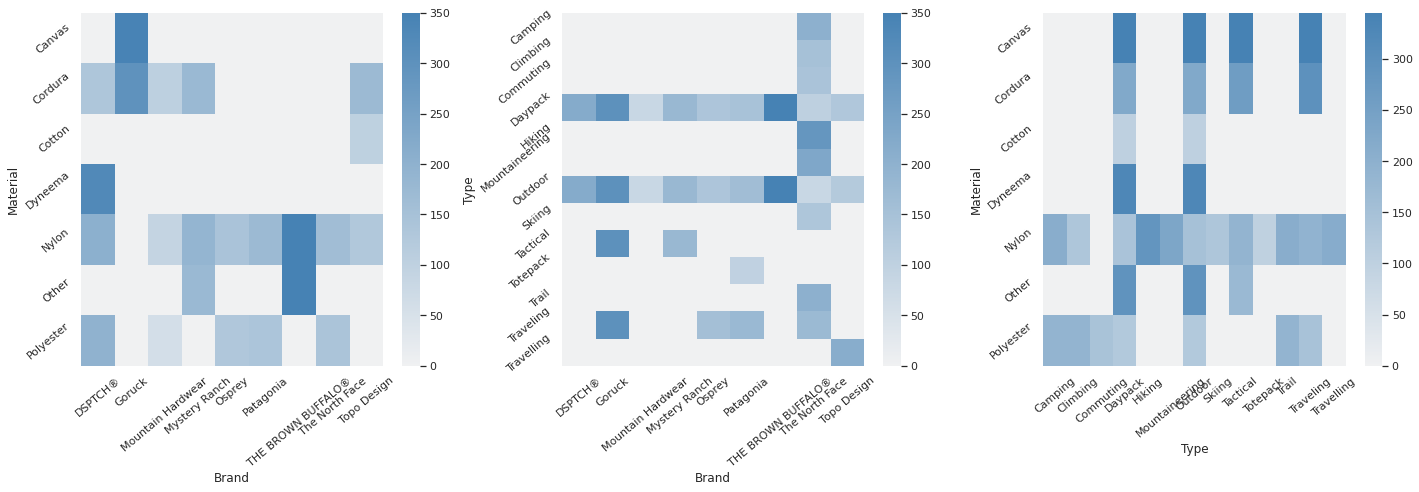

In [ ]:
#set a light pallete for our heatmap
pallete = sns.light_palette('steelblue', as_cmap = True)

#define a function to create heatmaps from any columns on our data.
def create_heatmap(col1, col2, i):
    #create pivot table
    backpacks_pivot = pd.pivot_table(data = backpacks_type_exploded, 
                                     columns = col1,
                                     index = col2,
                                     values = 'Price_in_USD',
                                     #fill with 0 so it shows up as a white space on the map
                                     fill_value = 0,
                                    aggfunc = 'mean')
    #create  the map from the table
    ax[i] = sns.heatmap(backpacks_pivot, cmap = pallete, ax = ax[i])
    #rotate the axis for easier reading
    ax[i].set_yticklabels(ax[i].get_yticklabels(), rotation = 40)
    ax[i].set_xticklabels(ax[i].get_xticklabels(), rotation = 40)
    #return axis for plotting on the figure
    return ax

#create figure
fig, ax = plt.subplots(1,3, figsize = (20,7), tight_layout = True)

#fill in axes
create_heatmap('Brand', 'Material', 0)
create_heatmap('Brand', 'Type', 1)
create_heatmap('Type', 'Material', 2)


plt.show()

#### We will use the variance in colors of the heatmap going accross either vertically or horizontally to draw conclusions, since both axis are made of categorical variables.

- Notice that the heatmaps are filled with white color. This means that those bags do not exist on our data.
- When comparing using the material and brand, we can see that most brands tend to have the same prices accross different  materials. We can say that the brand helps determine the price more.
- While comparing using the type and brand, we can also have the same conclusion that brand determines the prices more.
- While comparing the prices through type and material, The prices tend to stay consistent through the materials, but has some variance on the types. We can conclude that the type helps determine the price more.
- Final Observation

- The bags capacity does have a weak correlation with prices, so bigger bags should not always be more expensive.
- Categorically, we can determine that the price is based on this order: brand, type, material. But we can not be sure of this conclusion as our pivot table, thus our heatmap, is sparse.

In [ ]:
df_data.head(10)

,Product,Brand,Type,Laptop_Compartment,Capacity_in_ltr,Material,Avg_weight_in_kg,Price_in_USD
0,Surge Backpack,The North Face,Daypack,Yes,31.0,Nylon,1.200,129.0
1,Borealis Backpack,The North Face,Daypack,Yes,28.0,Nylon,1.000,99.0
2,Router Backpack,The North Face,Daypack,Yes,40.0,Nylon,1.300,159.0
3,Commuter Roll Top Pack,The North Face,Commuting/Daypack,Yes,23.0,Polyester,0.900,129.0
4,Jester Backpack,The North Face,Daypack,Yes,28.0,Polyester,0.740,69.0
5,Commuter Pack—L,The North Face,Commuting/Daypack,Yes,32.0,Polyester,1.250,159.0
6,Mountain Daypack—L,The North Face,Daypack,Yes,20.0,Nylon,0.625,99.0
7,Mountain Daypack - S,The North Face,Daypack,Yes,18.0,Nylon,0.485,79.0
8,Jester 26 Backpack,The North Face,Traveling/Daypack,Yes,26.0,Polyester,1.000,99.0
9,Terra 55 Backpack,The North Face,Hiking/Trail/Camping,Yes,55.0,Nylon,1.700,169.0


In [ ]:
df_data.shape

(107, 8)

In [ ]:
df_data.isnull().sum()

Product               0
Brand                 0
Type                  0
Laptop_Compartment    0
Capacity_in_ltr       0
Material              0
Avg_weight_in_kg      0
Price_in_USD          0
dtype: int64

In [ ]:
df_data.dtypes

Product                object
Brand                  object
Type                   object
Laptop_Compartment     object
Capacity_in_ltr       float64
Material               object
Avg_weight_in_kg      float64
Price_in_USD          float64
dtype: object

In [ ]:
df_data.describe()

,Capacity_in_ltr,Avg_weight_in_kg,Price_in_USD
count,107.000000,107.000000,107.000000
mean,27.680062,1.031390,164.353832
std,12.378764,0.393453,83.499966
min,6.000000,0.300000,48.930000
25%,20.500000,0.800000,99.000000
50%,25.000000,1.031390,149.000000
75%,30.000000,1.200000,189.000000
max,85.000000,2.500000,425.000000


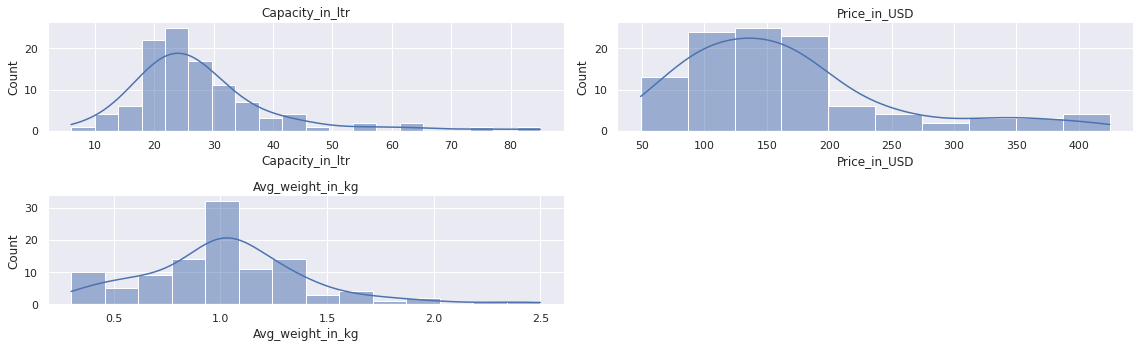

In [ ]:
col = ['Capacity_in_ltr', 'Price_in_USD', 'Avg_weight_in_kg']

plt.figure(figsize=(16, 5))

for i in range(len(col)):
    plt.subplot(2, 2, i+1)
    plt.title(col[i])
    sns.histplot(df_data, x=df_data[col[i]], kde=True)  # add kde=True for density curve
    sns.despine()  # remove top and right spines

plt.tight_layout()
plt.show()

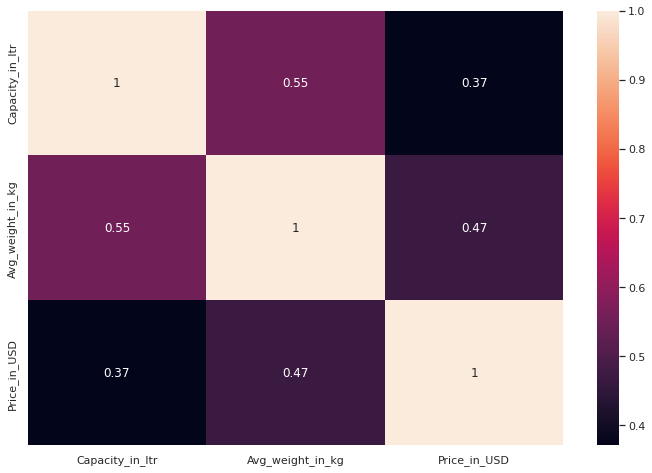

In [ ]:
sns.heatmap(df_data.corr(), annot=True)
plt.show()

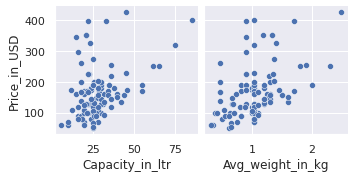

In [ ]:
sns.set(rc={'figure.figsize':(10,8)})
sns.pairplot(df_data, x_vars=['Capacity_in_ltr', 'Avg_weight_in_kg'], y_vars=['Price_in_USD'])
plt.show()

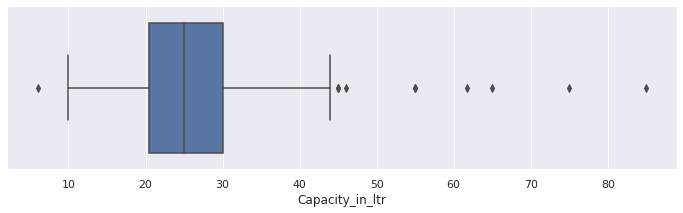

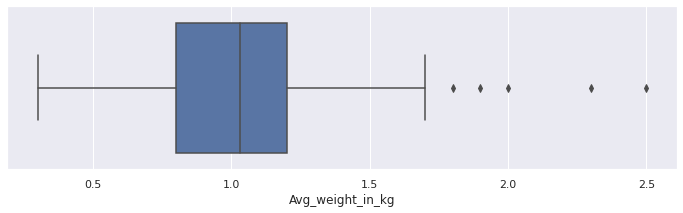

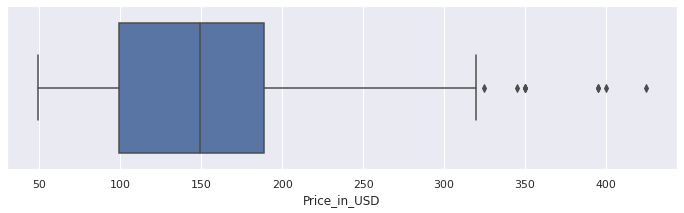

In [ ]:
X = ['Capacity_in_ltr', 'Avg_weight_in_kg', 'Price_in_USD']
for i in X:
    sns.set(rc={'figure.figsize':(12,3)})
    sns.boxplot(data=df_data, x=i)
    plt.show()

# Regration
- Any of the Linear Regression (any of Gradient / Stochastic /MiniBatch)/linear basis models/KNN/Locally weighted regression/ any of the regularization techniques). Justify your design choices at each step: Write as a markdown cell in jupyter notebook at the beginning of each subsection.


1. Perform and explain necessary pre-processing / feature engineering on this dataset
[0.5]
2. Perform the Machine Learning activity. Explain Attributes of interest, Regularization type with reason, model selected with reason [1.5]
3. Quantify and explain the quality of your ML model. Explain the choice of evaluation metric [1.5]
4. Your observation about the results (Hint: comment on the problem statement and conclude the effectiveness of the machine learning activity) [0.5]

In [ ]:
df_lr = df_data
df_lr.head(5)

,Product,Brand,Type,Laptop_Compartment,Capacity_in_ltr,Material,Avg_weight_in_kg,Price_in_USD
0,Surge Backpack,The North Face,Daypack,Yes,31.0,Nylon,1.20,129.0
1,Borealis Backpack,The North Face,Daypack,Yes,28.0,Nylon,1.00,99.0
2,Router Backpack,The North Face,Daypack,Yes,40.0,Nylon,1.30,159.0
3,Commuter Roll Top Pack,The North Face,Commuting/Daypack,Yes,23.0,Polyester,0.90,129.0
4,Jester Backpack,The North Face,Daypack,Yes,28.0,Polyester,0.74,69.0


In [ ]:
# Select the columns to use
categorical_var = ['Product', 'Brand', 'Type', 'Laptop_Compartment','Material']
numerical_var = 'Price_in_USD'


# Perform ANOVA
for i in categorical_var:
    groups = df_lr.groupby(i)[numerical_var].apply(list)
    f_val, p_val = stats.f_oneway(*groups)
    print(groups.head(3))
    print(f'Relation in between {i} & Price_in_USD ')
    print('F-value:', f_val)
    print('P-value:', p_val)
    print('\n')
    

Product
Altvia Pack 22L            [129.0]
Arbor Lid Pack 28L         [109.0]
Arbor Roll Top Pack 30L    [129.0]
Name: Price_in_USD, dtype: object
Relation in between Product & Price_in_USD 
F-value: nan
P-value: nan


Brand
DSPTCH®              [225.0, 275.0, 395.0, 225.0, 168.0, 260.0, 198...
Goruck               [325.0, 395.0, 425.0, 225.0, 255.0, 160.0, 295...
Mountain Hardwear                     [60.0, 67.5, 52.5, 120.0, 105.0]
Name: Price_in_USD, dtype: object
Relation in between Brand & Price_in_USD 
F-value: 12.981238074805422
P-value: 1.339672481694004e-12


Type
Climbing                    [89.0]
Climbing/Mountaineering    [179.0]
Climbing/Trail/Camping     [189.0]
Name: Price_in_USD, dtype: object
Relation in between Type & Price_in_USD 
F-value: 4.078051031456823
P-value: 6.112379321186368e-06


Laptop_Compartment
No                                 [350.0, 350.0, 350.0]
Yes    [129.0, 99.0, 159.0, 129.0, 69.0, 159.0, 99.0,...
Name: Price_in_USD, dtype: object
Relation in b

/usr/local/lib/python3.9/dist-packages/scipy/stats/_stats_py.py:3869: DegenerateDataWarning:

all input arrays have length 1.  f_oneway requires that at least one input has length greater than 1.



In [ ]:
df_lr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 107 entries, 0 to 106
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Product             107 non-null    object 
 1   Brand               107 non-null    object 
 2   Type                107 non-null    object 
 3   Laptop_Compartment  107 non-null    object 
 4   Capacity_in_ltr     107 non-null    float64
 5   Material            107 non-null    object 
 6   Avg_weight_in_kg    107 non-null    float64
 7   Price_in_USD        107 non-null    float64
dtypes: float64(3), object(5)
memory usage: 6.8+ KB


In [ ]:
for i in df_lr:
    print(df_lr[i].value_counts())
    print('\n','\n')


Surge Backpack                             1
Bookpack - Black Multicam Cordura Nylon    1
Ridgepack - Ecopak                         1
Ridgepack - Black Dyneema                  1
Ridgepack - Ballistic Nylon                1
                                          ..
Ultralight Black Hole® Tote Pack 27L       1
Descensionist Pack 40L                     1
Refugio Daypack 26L                        1
Arbor Lid Pack 28L                         1
Farpoint 40                                1
Name: Product, Length: 107, dtype: int64

 

The North Face        26
Topo Design           20
Osprey                16
Patagonia             13
DSPTCH®               11
Goruck                 8
Mystery Ranch          5
Mountain Hardwear      5
THE BROWN BUFFALO®     3
Name: Brand, dtype: int64

 

Daypack/Outdoor                       57
Daypack                               13
Daypack/Traveling/Outdoor/Tactical     8
Daypack/Outdoor/Tactical               5
Daypack/Outdoor/Traveling              5


### Handling outliers

In [ ]:
print(df_lr.columns)
print(df_lr.shape)

Index(['Product', 'Brand', 'Type', 'Laptop_Compartment', 'Capacity_in_ltr',
       'Material', 'Avg_weight_in_kg', 'Price_in_USD'],
      dtype='object')
(107, 8)


In [ ]:
# Finding outliers in all the numerical columns with 1.5 IQR rule and removing the outlier records 
col_numeric = ['Capacity_in_ltr','Avg_weight_in_kg','Price_in_USD']

for col in col_numeric: 
    q1 = df_lr[col].quantile(0.25)
    q3 = df_lr[col].quantile(0.75)
    iqr = q3-q1
    range_low  = q1-1.5*iqr
    range_high = q3+1.5*iqr
    df_lr = df_lr.loc[(df_lr[col] > range_low) & (df_lr[col] < range_high)]

df_lr.shape

(89, 8)

- We can see that there are (107-89)=18 records, which are outliers in the dataset. 

### Checking Data Imbalance

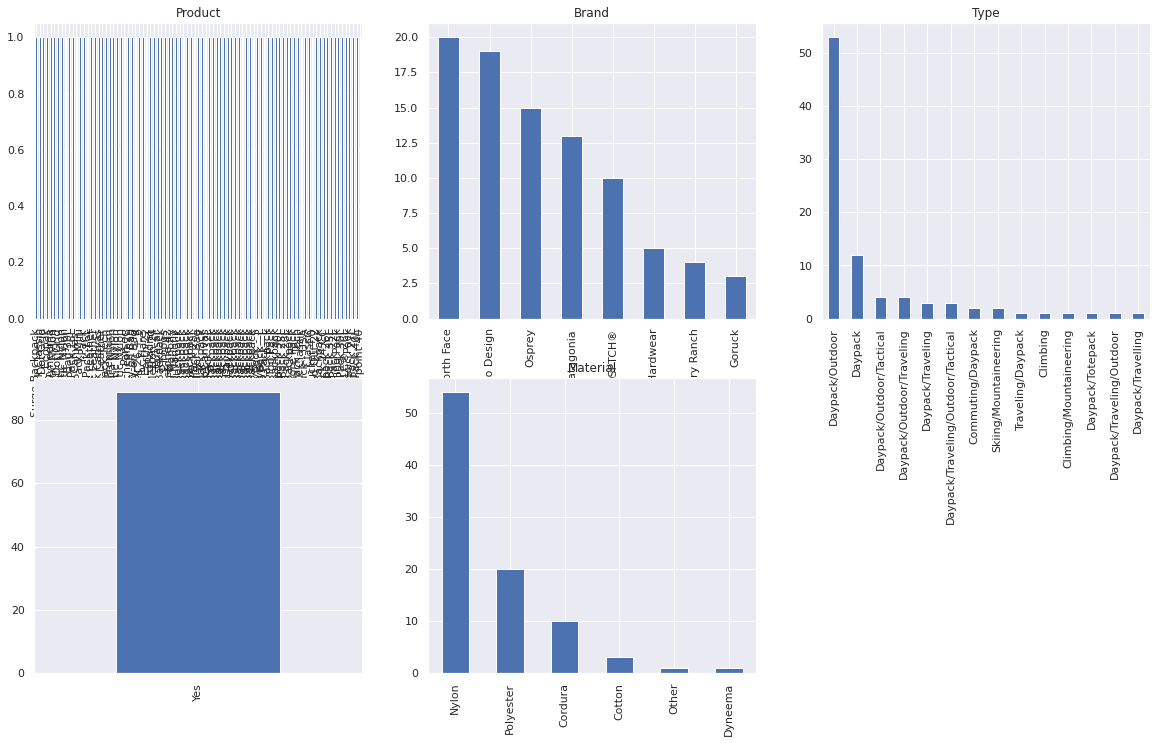

In [ ]:
# Listing categorical columns for checking data imbalance and plotting them
col_category = ['Product', 'Brand', 'Type', 'Laptop_Compartment', 
       'Material']

k=0
plt.figure(figsize=(20,25))
for col in col_category:    
    k=k+1
    plt.subplot(4, 3,k)    
    df_lr[col].value_counts().plot(kind='bar');
    plt.title(col)

***Observations***
'Product', 'Brand', 'Type', 'Laptop_Compartment', 
       'Material'
We can see that there is data imbalance in below columns:-
1. `Product` - Is not suitable for the model as all are indivitual in product type.
2. `Brand` - North Face has the more brand varity in USA Market.
3. `Type` - Dayback/Outdoor is the most common type of bagpack in USA.
4. `Laptop_Compartment` - Mostly all the bag does have the Laptop compartment.
5. `Material` - Nylon is the mostly used material in the USA.


In [ ]:
df_lr.drop(['Product'], axis="columns", inplace=True)
df_lr.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 89 entries, 0 to 106
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Brand               89 non-null     object 
 1   Type                89 non-null     object 
 2   Laptop_Compartment  89 non-null     object 
 3   Capacity_in_ltr     89 non-null     float64
 4   Material            89 non-null     object 
 5   Avg_weight_in_kg    89 non-null     float64
 6   Price_in_USD        89 non-null     float64
dtypes: float64(3), object(4)
memory usage: 5.6+ KB


### Visualising the data to check the possiblity of linear regression model

<Figure size 864x864 with 0 Axes>

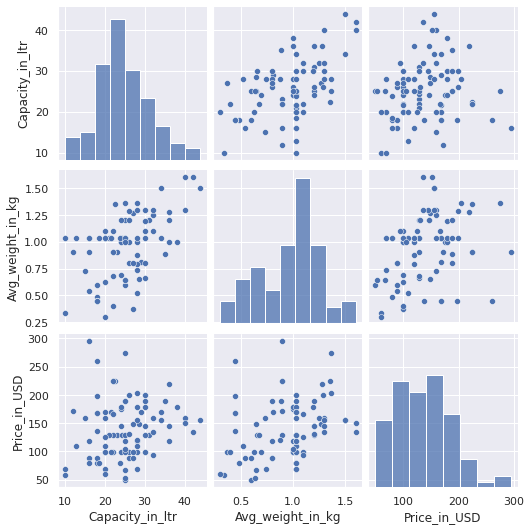

In [ ]:
# Visualising the numerical variables
plt.figure(figsize=(12,12))
sns.pairplot(df_lr[col_numeric])
plt.show()

We can see that there are are no columns that have linear relationship with the target variable "Price_in_USD". So, we can further progress with the catagorical data regularization to gain the further insight

### Visualising the categorical variables

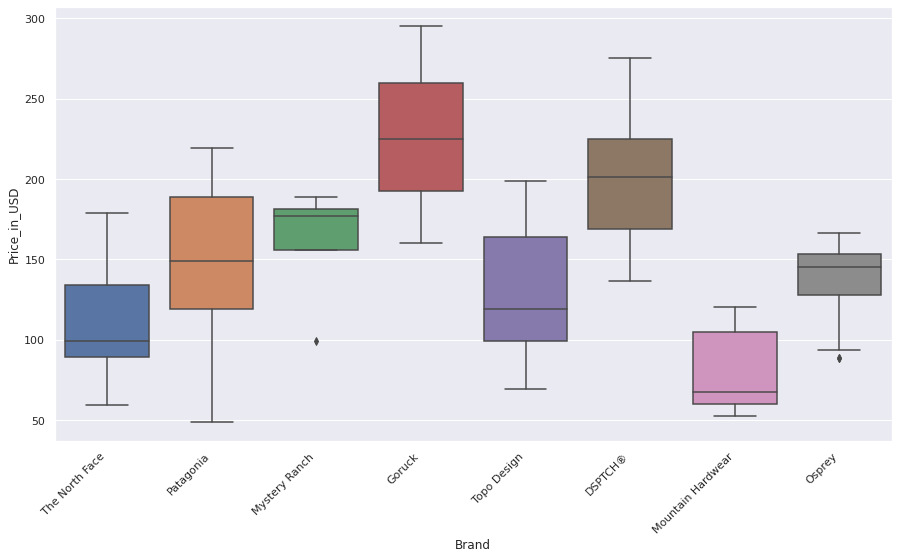

In [ ]:
plt.figure(figsize=(15,8))
ax = sns.boxplot(x = 'Brand', y = 'Price_in_USD', data = df_lr)
temp = ax.set_xticklabels(ax.get_xticklabels(), rotation = 45, horizontalalignment='right')

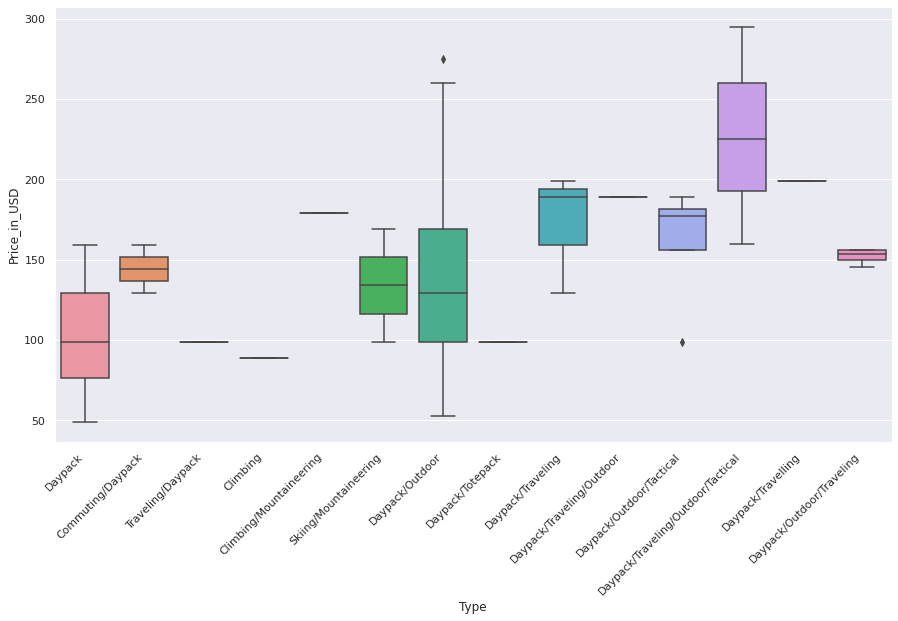

In [ ]:
plt.figure(figsize=(15,8))
ax = sns.boxplot(x = 'Type', y = 'Price_in_USD', data = df_lr)
temp = ax.set_xticklabels(ax.get_xticklabels(), rotation = 45, horizontalalignment='right')

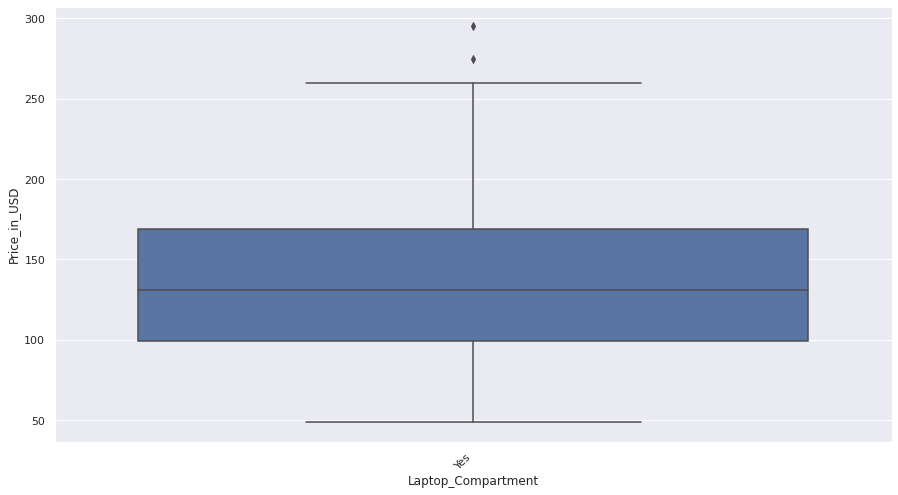

In [ ]:
plt.figure(figsize=(15,8))
ax = sns.boxplot(x = 'Laptop_Compartment', y = 'Price_in_USD', data = df_lr)
temp = ax.set_xticklabels(ax.get_xticklabels(), rotation = 45, horizontalalignment='right')

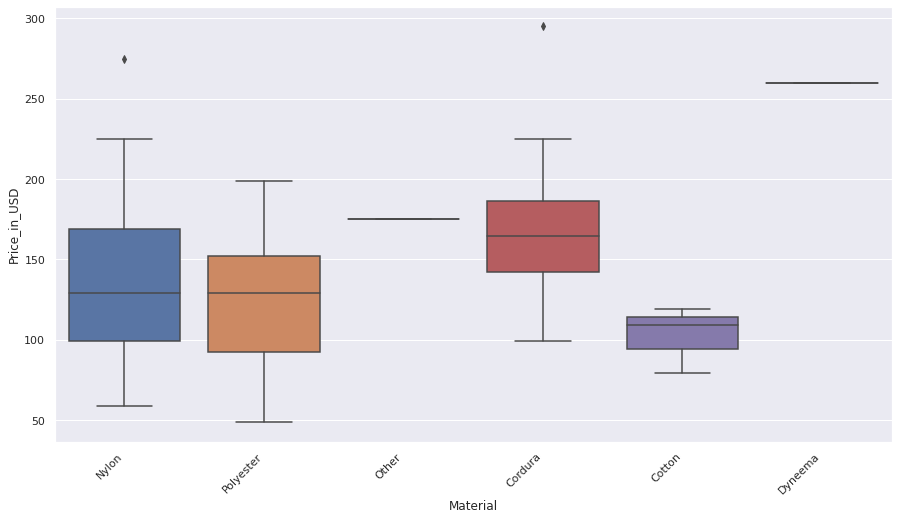

In [ ]:
plt.figure(figsize=(15,8))
ax = sns.boxplot(x = 'Material', y = 'Price_in_USD', data = df_lr)
temp = ax.set_xticklabels(ax.get_xticklabels(), rotation = 45, horizontalalignment='right')

# Step 2:- Preparing the data for model building

### Encoding

#### Converting categorical variables (fueltype, aspiration, doornumber, drivewheel, enginelocation) with two levels to binary variables.

In [ ]:
# Laptop Compartment
# Convert "Yes" to 1 and "No" to 0
df_lr['Laptop_Compartment'] = df_lr['Laptop_Compartment'].map({'Yes': 1, 'No': 0})
df_lr.head()

,Brand,Type,Laptop_Compartment,Capacity_in_ltr,Material,Avg_weight_in_kg,Price_in_USD
0,The North Face,Daypack,1,31.0,Nylon,1.20,129.0
1,The North Face,Daypack,1,28.0,Nylon,1.00,99.0
2,The North Face,Daypack,1,40.0,Nylon,1.30,159.0
3,The North Face,Commuting/Daypack,1,23.0,Polyester,0.90,129.0
4,The North Face,Daypack,1,28.0,Polyester,0.74,69.0


### Dummy variables
Converting other categorical variables with more than two levels to dummy variables. We have to create (n-1) dummy variables by removing the base status. `n` is the number of levels of the variables. 

### Brand

In [ ]:
# Creating dummy variables for 'Brand'
# Dropping the redundant dummy variable (-2)
brand_status = pd.get_dummies(df_lr['Brand'],drop_first=True)
brand_status.head()

,Goruck,Mountain Hardwear,Mystery Ranch,Osprey,Patagonia,The North Face,Topo Design
0,0,0,0,0,0,1,0
1,0,0,0,0,0,1,0
2,0,0,0,0,0,1,0
3,0,0,0,0,0,1,0
4,0,0,0,0,0,1,0


In [ ]:
# Concating the dummy dataframe with original dataframe
df_lr = pd.concat([df_lr,brand_status], axis=1)
df_lr.head()

,Brand,Type,Laptop_Compartment,Capacity_in_ltr,Material,Avg_weight_in_kg,Price_in_USD,Goruck,Mountain Hardwear,Mystery Ranch,...,Patagonia,The North Face,Topo Design,Goruck,Mountain Hardwear,Mystery Ranch,Osprey,Patagonia,The North Face,Topo Design
0,The North Face,Daypack,1,31.0,Nylon,1.20,129.0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
1,The North Face,Daypack,1,28.0,Nylon,1.00,99.0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
2,The North Face,Daypack,1,40.0,Nylon,1.30,159.0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
3,The North Face,Commuting/Daypack,1,23.0,Polyester,0.90,129.0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
4,The North Face,Daypack,1,28.0,Polyester,0.74,69.0,0,0,0,...,0,1,0,0,0,0,0,0,1,0


In [ ]:
# Dropping the 'Brand' column as we don't need it anymore
df_lr = df_lr.drop('Brand',axis=1)
df_lr.head()

,Type,Laptop_Compartment,Capacity_in_ltr,Material,Avg_weight_in_kg,Price_in_USD,Goruck,Mountain Hardwear,Mystery Ranch,Osprey,...,Patagonia,The North Face,Topo Design,Goruck,Mountain Hardwear,Mystery Ranch,Osprey,Patagonia,The North Face,Topo Design
0,Daypack,1,31.0,Nylon,1.20,129.0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
1,Daypack,1,28.0,Nylon,1.00,99.0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
2,Daypack,1,40.0,Nylon,1.30,159.0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
3,Commuting/Daypack,1,23.0,Polyester,0.90,129.0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
4,Daypack,1,28.0,Polyester,0.74,69.0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0


### Type

In [ ]:
# Creating dummy variables for 'Type'
# Dropping the redundant dummy variable (-2)
type_status = pd.get_dummies(df_lr['Type'],drop_first=True)
type_status.head()

,Climbing/Mountaineering,Commuting/Daypack,Daypack,Daypack/Outdoor,Daypack/Outdoor/Tactical,Daypack/Outdoor/Traveling,Daypack/Totepack,Daypack/Traveling,Daypack/Traveling/Outdoor,Daypack/Traveling/Outdoor/Tactical,Daypack/Travelling,Skiing/Mountaineering,Traveling/Daypack
0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,0,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0,1,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,0,0,0


In [ ]:
# Dropping the 'Type' column as we don't need it anymore
df_lr = df_lr.drop('Type',axis=1)
df_lr.head()

,Laptop_Compartment,Capacity_in_ltr,Material,Avg_weight_in_kg,Price_in_USD,Goruck,Mountain Hardwear,Mystery Ranch,Osprey,Patagonia,...,Patagonia,The North Face,Topo Design,Goruck,Mountain Hardwear,Mystery Ranch,Osprey,Patagonia,The North Face,Topo Design
0,1,31.0,Nylon,1.20,129.0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
1,1,28.0,Nylon,1.00,99.0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
2,1,40.0,Nylon,1.30,159.0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
3,1,23.0,Polyester,0.90,129.0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
4,1,28.0,Polyester,0.74,69.0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0


In [ ]:
# Creating dummy variables for 'Material'
# Dropping the redundant dummy variable (-2)
material_status = pd.get_dummies(df_lr['Material'], drop_first = True)
material_status.head()

,Cotton,Dyneema,Nylon,Other,Polyester
0,0,0,1,0,0
1,0,0,1,0,0
2,0,0,1,0,0
3,0,0,0,0,1
4,0,0,0,0,1


In [ ]:
# Dropping the 'Material' column as we don't need it anymore
df_lr = df_lr.drop('Material',axis=1)
df_lr.head()

,Laptop_Compartment,Capacity_in_ltr,Avg_weight_in_kg,Price_in_USD,Goruck,Mountain Hardwear,Mystery Ranch,Osprey,Patagonia,The North Face,...,Patagonia,The North Face,Topo Design,Goruck,Mountain Hardwear,Mystery Ranch,Osprey,Patagonia,The North Face,Topo Design
0,1,31.0,1.20,129.0,0,0,0,0,0,1,...,0,1,0,0,0,0,0,0,1,0
1,1,28.0,1.00,99.0,0,0,0,0,0,1,...,0,1,0,0,0,0,0,0,1,0
2,1,40.0,1.30,159.0,0,0,0,0,0,1,...,0,1,0,0,0,0,0,0,1,0
3,1,23.0,0.90,129.0,0,0,0,0,0,1,...,0,1,0,0,0,0,0,0,1,0
4,1,28.0,0.74,69.0,0,0,0,0,0,1,...,0,1,0,0,0,0,0,0,1,0


In [ ]:
df_lr.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 89 entries, 0 to 106
Data columns (total 25 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Laptop_Compartment  89 non-null     int64  
 1   Capacity_in_ltr     89 non-null     float64
 2   Avg_weight_in_kg    89 non-null     float64
 3   Price_in_USD        89 non-null     float64
 4   Goruck              89 non-null     uint8  
 5   Mountain Hardwear   89 non-null     uint8  
 6   Mystery Ranch       89 non-null     uint8  
 7   Osprey              89 non-null     uint8  
 8   Patagonia           89 non-null     uint8  
 9   The North Face      89 non-null     uint8  
 10  Topo Design         89 non-null     uint8  
 11  Goruck              89 non-null     uint8  
 12  Mountain Hardwear   89 non-null     uint8  
 13  Mystery Ranch       89 non-null     uint8  
 14  Osprey              89 non-null     uint8  
 15  Patagonia           89 non-null     uint8  
 16  The North

## Splitting data into train and test

In [ ]:
# Splitting train and test dataset into 70:30 percent ratio.
df_train, df_test = train_test_split(df_lr, train_size=0.7, random_state=100)
print(df_train.shape)
print(df_test.shape)

(62, 25)
(27, 25)


In [ ]:
df_lr.columns

Index(['Laptop_Compartment', 'Capacity_in_ltr', 'Avg_weight_in_kg',
       'Price_in_USD', 'Goruck', 'Mountain Hardwear', 'Mystery Ranch',
       'Osprey', 'Patagonia', 'The North Face', 'Topo Design', 'Goruck',
       'Mountain Hardwear', 'Mystery Ranch', 'Osprey', 'Patagonia',
       'The North Face', 'Topo Design', 'Goruck', 'Mountain Hardwear',
       'Mystery Ranch', 'Osprey', 'Patagonia', 'The North Face',
       'Topo Design'],
      dtype='object')

### Rescaling the Features with Min-max scaling (Normalization)

In [ ]:
# Create a list of numeric variables. We don't need categorical variables because they are already scalled in 0 and 1.
num_vars = ['Capacity_in_ltr','Avg_weight_in_kg','Price_in_USD']

# Instantiate an object
scaler = MinMaxScaler()

# Fit the data in the object
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])
df_train.head()

,Laptop_Compartment,Capacity_in_ltr,Avg_weight_in_kg,Price_in_USD,Goruck,Mountain Hardwear,Mystery Ranch,Osprey,Patagonia,The North Face,...,Patagonia,The North Face,Topo Design,Goruck,Mountain Hardwear,Mystery Ranch,Osprey,Patagonia,The North Face,Topo Design
47,1,0.367647,0.807247,0.715528,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
54,1,0.441176,0.561596,0.325395,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
91,1,0.294118,0.614495,0.309140,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
27,1,0.529412,0.379337,0.284756,0,0,0,0,1,0,...,1,0,0,0,0,0,0,1,0,0
63,1,0.341176,0.561596,0.487951,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1


In [ ]:
df_train.describe()

,Laptop_Compartment,Capacity_in_ltr,Avg_weight_in_kg,Price_in_USD,Goruck,Mountain Hardwear,Mystery Ranch,Osprey,Patagonia,The North Face,...,Patagonia,The North Face,Topo Design,Goruck,Mountain Hardwear,Mystery Ranch,Osprey,Patagonia,The North Face,Topo Design
count,62.0,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,...,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000
mean,1.0,0.429554,0.501346,0.354948,0.048387,0.064516,0.032258,0.193548,0.080645,0.258065,...,0.080645,0.258065,0.209677,0.048387,0.064516,0.032258,0.193548,0.080645,0.258065,0.209677
std,0.0,0.195329,0.216272,0.215132,0.216335,0.247676,0.178127,0.398304,0.274512,0.441142,...,0.274512,0.441142,0.410402,0.216335,0.247676,0.178127,0.398304,0.274512,0.441142,0.410402
min,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.0,0.294118,0.380301,0.203479,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.0,0.430882,0.561596,0.325395,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.0,0.529412,0.614495,0.486935,0.000000,0.000000,0.000000,0.000000,0.000000,0.750000,...,0.000000,0.750000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.750000,0.000000
max,1.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Step 3:- Training the model

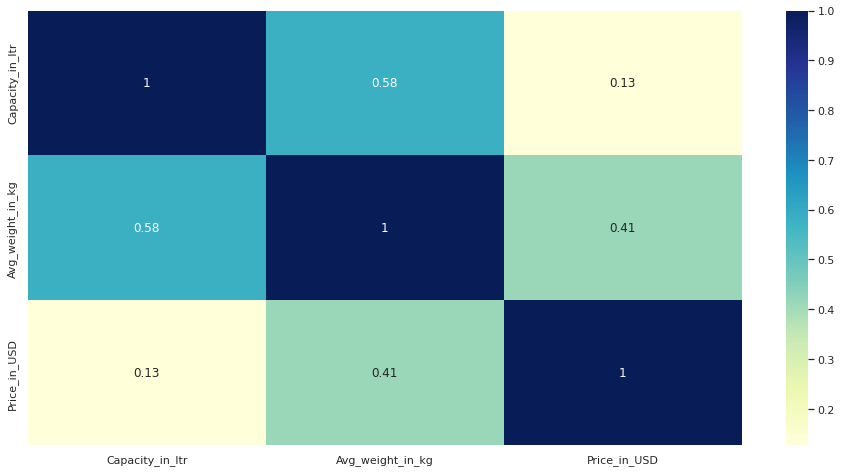

In [ ]:
#Let's check the correlation coefficients of all numerical variables except categorical variables to see which variables are highly correlated

plt.figure(figsize = (16, 8))
sns.heatmap(df_train[num_vars].corr(), annot = True, cmap="YlGnBu")
plt.show()

In [ ]:
# Popping out the 'Price_in USD' column for y_train
y_train = df_train.pop('Price_in_USD') 
# Creating X_train
X_train = df_train

In [ ]:
y_train.head()

47    0.715528
54    0.325395
91    0.309140
27    0.284756
63    0.487951
Name: Price_in_USD, dtype: float64

In [ ]:
X_train.head()

,Laptop_Compartment,Capacity_in_ltr,Avg_weight_in_kg,Goruck,Mountain Hardwear,Mystery Ranch,Osprey,Patagonia,The North Face,Topo Design,...,Patagonia,The North Face,Topo Design,Goruck,Mountain Hardwear,Mystery Ranch,Osprey,Patagonia,The North Face,Topo Design
47,1,0.367647,0.807247,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
54,1,0.441176,0.561596,0,0,0,0,0,0,1,...,0,0,1,0,0,0,0,0,0,1
91,1,0.294118,0.614495,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
27,1,0.529412,0.379337,0,0,0,0,1,0,0,...,1,0,0,0,0,0,0,1,0,0
63,1,0.341176,0.561596,0,0,0,0,0,0,1,...,0,0,1,0,0,0,0,0,0,1


## Dealing with multicollinearity

We will  follow a balanced approach by combining the automated and manual feature selection process.

- Automated approcah - We will start with RFE here by selecting top "n" features.
- Manual - We will fine tune our feature selection manually.

### RFE 

In [ ]:
# Creating the model using scikit learn 
lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression()

In [ ]:
# RFE with the number of variables 15. It will select top 15 features.
rfe = RFE(estimator=lm,n_features_to_select=15)
ref = rfe.fit(X_train, y_train)

In [ ]:
# Listing the feature variables with their RFE status and rank 
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Laptop_Compartment', False, 10),
 ('Capacity_in_ltr', True, 1),
 ('Avg_weight_in_kg', True, 1),
 ('Goruck', False, 8),
 ('Mountain Hardwear', True, 1),
 ('Mystery Ranch', False, 7),
 ('Osprey', False, 2),
 ('Patagonia', True, 1),
 ('The North Face', True, 1),
 ('Topo Design', False, 3),
 ('Goruck', False, 5),
 ('Mountain Hardwear', True, 1),
 ('Mystery Ranch', True, 1),
 ('Osprey', True, 1),
 ('Patagonia', True, 1),
 ('The North Face', True, 1),
 ('Topo Design', True, 1),
 ('Goruck', False, 9),
 ('Mountain Hardwear', True, 1),
 ('Mystery Ranch', False, 6),
 ('Osprey', True, 1),
 ('Patagonia', False, 4),
 ('The North Face', True, 1),
 ('Topo Design', True, 1)]

In [ ]:
# The top 15 features selected by the RFE
rfe_cols = X_train.columns[rfe.support_]
rfe_cols

Index(['Capacity_in_ltr', 'Avg_weight_in_kg', 'Mountain Hardwear', 'Patagonia',
       'The North Face', 'Mountain Hardwear', 'Mystery Ranch', 'Osprey',
       'Patagonia', 'The North Face', 'Topo Design', 'Mountain Hardwear',
       'Osprey', 'The North Face', 'Topo Design'],
      dtype='object')

In [ ]:
# Not selected features by RFE
X_train.columns[~rfe.support_]

Index(['Laptop_Compartment', 'Goruck', 'Mystery Ranch', 'Osprey',
       'Topo Design', 'Goruck', 'Goruck', 'Mystery Ranch', 'Patagonia'],
      dtype='object')

## Building model using statsmodel for the detailed statistics

### Model:-1 with all RFE variables

In [ ]:
# Creating X_train dataframe with RFE selected variables
X_train_1 = X_train[rfe_cols]
X_train_1.head()

,Capacity_in_ltr,Avg_weight_in_kg,Mountain Hardwear,Mountain Hardwear,Mountain Hardwear,Patagonia,Patagonia,Patagonia,The North Face,The North Face,...,Mountain Hardwear,Osprey,Osprey,Osprey,The North Face,The North Face,The North Face,Topo Design,Topo Design,Topo Design
47,0.367647,0.807247,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
54,0.441176,0.561596,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,1
91,0.294118,0.614495,0,0,0,0,0,0,0,0,...,0,1,1,1,0,0,0,0,0,0
27,0.529412,0.379337,0,0,0,1,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
63,0.341176,0.561596,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,1


In [ ]:
# Adding constant because statsmodel library doesn't include the intercept by default. 
X_train_sm_1 = sm.add_constant(X_train_1)

In [ ]:
# Creating model
lr_1 = sm.OLS(y_train, X_train_sm_1)

In [ ]:
# Fit the model
lr_model_1 = lr_1.fit()

In [ ]:
print(lr_model_1.summary())

                            OLS Regression Results                            
Dep. Variable:           Price_in_USD   R-squared:                       0.692
Model:                            OLS   Adj. R-squared:                  0.645
Method:                 Least Squares   F-statistic:                     14.85
Date:                Thu, 09 Mar 2023   Prob (F-statistic):           3.91e-11
Time:                        05:40:16   Log-Likelihood:                 44.250
No. Observations:                  62   AIC:                            -70.50
Df Residuals:                      53   BIC:                            -51.36
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.4330      0.05

### Model-1 analysis
***Overall model fit***

F-stats = 14.85, so the prob(F-stats) is very low.

***R-squared and Adj. R-squared***
- R-squared = 0.692
- Adj. R-squared = 0.645

We can see that both R-squared and Adj. R-squared are not that high and closer to each other. This tells us that the extent of the fit or the percentage of variance of the data explained by the model is not high.

***p-values of coefficients***

We can see that Capacity_in_ltr p-value(0.150) is high. Let's check the VIF of the variables and make a decission for which variable to remove.

### Checking VIF for Model-1

In [ ]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_1.columns
vif['VIF'] = [variance_inflation_factor(X_train_1.values, i) for i in range(X_train_1.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
20,Patagonia,inf
21,Patagonia,inf
23,The North Face,inf
24,The North Face,inf
25,The North Face,inf
26,Topo Design,inf
27,Topo Design,inf
28,Topo Design,inf
29,Mountain Hardwear,inf
30,Mountain Hardwear,inf


***Observations***

We can see that there are few variables whose VIF is infinity. That indicates these variables are highly correlated with other variables. Also, there are few variables, whose VIF are very high.

We will remove the variables one by one after each model analysis by following the below manner.
1. `High p-value and high VIF` :- We will remove this first.
2. `High p-value and low VIF` :- We will remove this next. Because once we remove this variable there may be possiblity that when we again create the VIF, the VIF may become low. Because VIF is the corealtion of a variable with rest of the other variables.
3. `Low p-value and high VIF` :- Remove this variable after the ones above.
4. `Low p-value and low VIF` :- We will keep that variable.

###### High p-value and high VIF :- Capacity_in_ltr
VIF= 13.07 and p-value = 0.150

In [ ]:
# Removing wheelbase
X_train_2 = X_train_1.drop('Capacity_in_ltr',axis=1)

In [ ]:
# Adding constant 
X_train_sm_2 = sm.add_constant(X_train_2)
# Creating and fitting the model
lr_model_2 = sm.OLS(y_train, X_train_sm_2).fit()
print(lr_model_2.summary())

                            OLS Regression Results                            
Dep. Variable:           Price_in_USD   R-squared:                       0.679
Model:                            OLS   Adj. R-squared:                  0.637
Method:                 Least Squares   F-statistic:                     16.32
Date:                Thu, 09 Mar 2023   Prob (F-statistic):           2.49e-11
Time:                        07:00:32   Log-Likelihood:                 43.024
No. Observations:                  62   AIC:                            -70.05
Df Residuals:                      54   BIC:                            -53.03
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.4401      0.05

### Model-2 analysis
***Overall model fit***

- F-stats = 16.32 (slightly increased from Model-1 14.85)
- Prob(F-stats) is slightly decreased.
- The overall model fit is significant.

***R-squared and Adj. R-squared***
- R-squared = 0.679 (No significant change from Model-1)
- Adj. R-squared = 0.637 (No significant change from Model-1)
- Both are closer to each other.

***p-values of coefficients***

- High p-values
    - Mystery Ranch = 0.102


In [ ]:
# Create VIF for Model-2
vif = pd.DataFrame()
vif['Features'] = X_train_2.columns
vif['VIF'] = [variance_inflation_factor(X_train_2.values, i) for i in range(X_train_2.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
20,Patagonia,inf
1,Mountain Hardwear,inf
22,The North Face,inf
23,The North Face,inf
24,The North Face,inf
25,Topo Design,inf
26,Topo Design,inf
27,Topo Design,inf
28,Mountain Hardwear,inf
29,Mountain Hardwear,inf


### Model:-3 Rebuilding the model without `Mystery Ranch`

In [ ]:
# Removing boreratio
X_train_3 = X_train_2.drop('Mystery Ranch',axis=1)

In [ ]:
# Adding constant 
X_train_sm_3 = sm.add_constant(X_train_3)
# Creating and fitting the model
lr_model_3 = sm.OLS(y_train, X_train_sm_3).fit()
print(lr_model_3.summary())

                            OLS Regression Results                            
Dep. Variable:           Price_in_USD   R-squared:                       0.663
Model:                            OLS   Adj. R-squared:                  0.626
Method:                 Least Squares   F-statistic:                     18.00
Date:                Thu, 09 Mar 2023   Prob (F-statistic):           2.02e-11
Time:                        07:11:12   Log-Likelihood:                 41.474
No. Observations:                  62   AIC:                            -68.95
Df Residuals:                      55   BIC:                            -54.06
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.4177      0.05

In [ ]:
X_train_3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 62 entries, 47 to 8
Data columns (total 37 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Avg_weight_in_kg   62 non-null     float64
 1   Mountain Hardwear  62 non-null     uint8  
 2   Mountain Hardwear  62 non-null     uint8  
 3   Mountain Hardwear  62 non-null     uint8  
 4   Patagonia          62 non-null     uint8  
 5   Patagonia          62 non-null     uint8  
 6   Patagonia          62 non-null     uint8  
 7   The North Face     62 non-null     uint8  
 8   The North Face     62 non-null     uint8  
 9   The North Face     62 non-null     uint8  
 10  Mountain Hardwear  62 non-null     uint8  
 11  Mountain Hardwear  62 non-null     uint8  
 12  Mountain Hardwear  62 non-null     uint8  
 13  Osprey             62 non-null     uint8  
 14  Osprey             62 non-null     uint8  
 15  Osprey             62 non-null     uint8  
 16  Patagonia          62 non-nu